# 230406 스터디 실습
  
작성자 : 김선영  
  
Bayesian Classifier에 대한 강의를 듣고 그에 해당하는 실습을 진행한다.

__________

### 실습 1  
sklearn 모듈에 있는 naive_bayes의 GaussianNB 모델을 사용한다.

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

++ iris dataset

In [3]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=230406)
gnb = GaussianNB()
y_pred = gnb.fit(X_train,y_train).predict(X_test)

In [4]:
print("Number of mislabeled points out of a total %d points : %d"%(X_test.shape[0], (y_test !=y_pred).sum()))

Number of mislabeled points out of a total 75 points : 4


++ moon dataset

In [25]:
import matplotlib.pyplot as plt
import sklearn.datasets as ds

In [40]:
X, y = ds.make_moons(1000,noise=0.05)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state = 123)

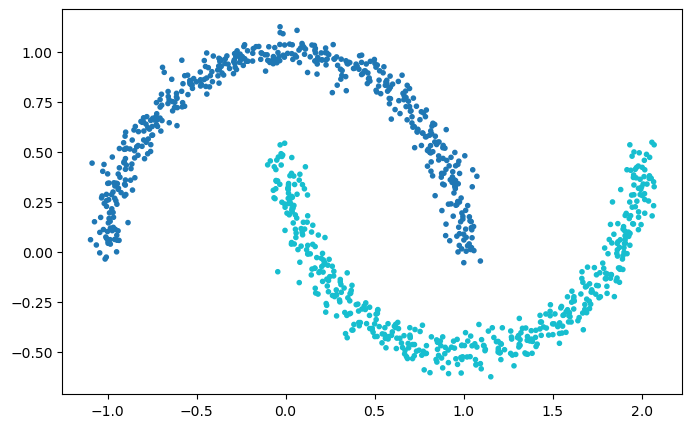

In [41]:
plt.figure(figsize = (8,5))
plt.scatter(X[:,0],X[:,1], c=y, marker='.', cmap='tab10')

In [43]:
model = GaussianNB()
model.fit(X_train,y_train)
pred = model.predict(X_test)

0.8833333333333333

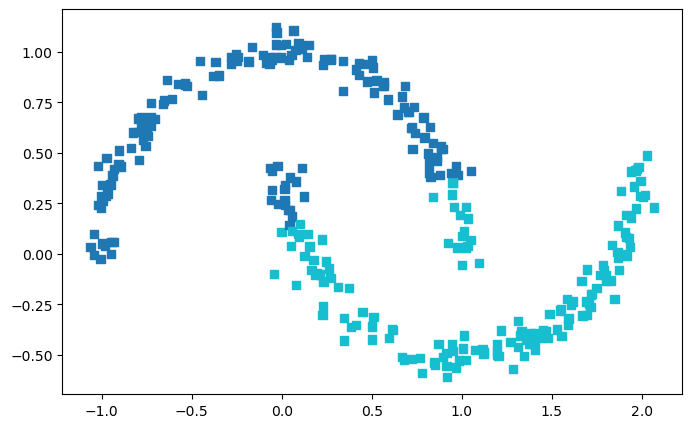

In [48]:
plt.figure(figsize = (8,5))
plt.scatter(X_test[:,0],X_test[:,1], c= pred, marker = ',', cmap='tab10')
# 모델 정확도
accuracy_score(y_test, pred)

0.8433333333333334

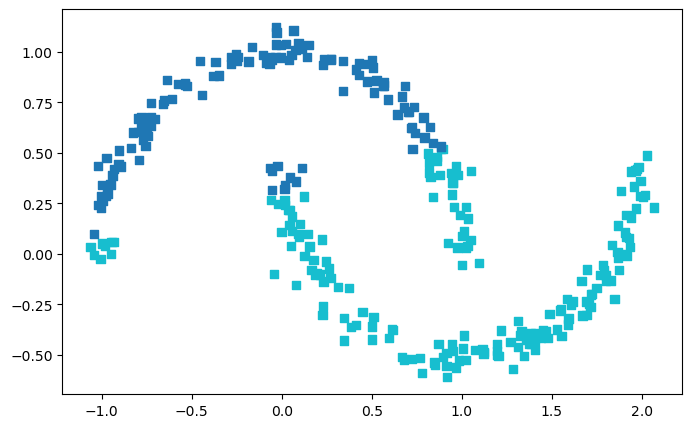

In [51]:
model_prior = GaussianNB(priors=[.2,.8])
model_prior.fit(X_train,y_train)
pred_prior = model_prior.predict(X_test)
plt.figure(figsize = (8,5))
plt.scatter(X_test[:,0],X_test[:,1], c= pred_prior, marker = ',', cmap='tab10')
# 모델 정확도
accuracy_score(y_test, pred_prior)

## 실습 2
  
뉴스그룹 데이터를 분류하는 모델을 나이브베이즈 분류기를 가지고 만들어 본다.  
  
사이킷 런에는 Twenty Newsgroups라고 불리는 20개의 다른 주제를 가진 18,846개의 뉴스그룹 데이터를 제공한다. 해당 데이터는 이미 훈련 데이터(11,314개)와 테스트 데이터(7,532개)를 미리 분류해 놓았기 때문에 별도로 데이터셋을 나눌 필요가 없다.

- **뉴스 그룹 데이터에 대한 이해**
> 해당 데이터는 총 6개의 속성을 갖고 있으며, 그 중에서 우리가 사용할 것은 해당 데이터의 본문을 갖고 있는 'data'속성과 해당 데이터가 어떤 카테고리에 속하는지 0-19까지의 라벨이 붙어있는 'target'속성이다.

In [6]:
# 훈련 데이터 다운로드
from sklearn.datasets import fetch_20newsgroups
newsdata = fetch_20newsgroups(subset = 'train')

위의 코드에서 subset 부분에 'all'을 넣으면 18,846개의 전체 데이터 다운로드가 가능하다.

In [7]:
print(newsdata.keys())  # 해당 데이터가 어떤 속성으로 구성되어져 있는지 출력
print(len(newsdata.data), len(newsdata.filenames), len(newsdata.target_names),len(newsdata.target))

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
11314 11314 20 11314


위의 코드를 통해 train sample은 총 11,314개로 구성되어 있으며, newsdata.target_names는 20개임을 확인하였다.  
어떤 카테고리들이 있는지 확인 가능하다.

In [8]:
print(newsdata.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [10]:
## 첫번째 샘플 확인해보기
print(newsdata.target_names[0]) # 첫번째 샘플 라벨
print(newsdata.data[0]) # 첫번째 샘플의 내용

alt.atheism
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







- **나이브 베이즈 분류**  
  
이제 위의 데이터를 가지고 전처리를 진행하도록 한다. 모델링에 사용할 데이터는 newsdata.data와 newsdata.target이다. 이때, 전처리해야 하는 데이터는 newsdata.data로 위에서 확인가능하듯 토큰화가 되어 있지 않다.  
나이브 베이즈 분류를 위해 데이터를 BoW(Bag of Words)로 만들어줄 필요가 있다.  
  
여기서는 입력한 텍스트를 자동으로 BoW로 만드는 CountVectorizer를 사용한다.  
(BoW 참고: https://wikidocs.net/22650).  
(DTM 참고: https://wikidocs.net/24559)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
from sklearn.metrics import accuracy_score  # 정확도 계산

In [14]:
dtmvector = CountVectorizer()
X_train_dtm = dtmvector.fit_transform(newsdata.data)
print(X_train_dtm.shape)

(11314, 130107)


위에서 DTM(Document-Term Matrix)를 구한 것을 가지고 DTM 내에 있는 각 단어에 대한 중요도를 계산할 수 있는 TF-IDF(Term Frequency-Inverse Document Frequency) 가중치를 구하여 모델에 입력하도록 한다.  
  
 ++ *TF-IDF 행렬이 항상 DTM으로 수행했을 때보다 성능이 뛰어나지는 않다.*
   
사이킷런에서 TF-IDF를 자동 계산해주는 TfidfVectorizer 클래스를 제공한다.

In [15]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(X_train_dtm)
print(tfidfv.shape)

(11314, 130107)


In [16]:
mod = MultinomialNB()
mod.fit(tfidfv,newsdata.target)

MultinomialNB()

훈련에 주로 사용된 데이터가 들어왔을 땐 분류기가 잘 작동하지만, **훈련 데이터에 없던 값이 들어오거나 이상값이 들어올 경우 그에 대한 우도가 0**이 되어, 정상적인 분류가 되지 않을 때가 있다. 이러한 경우를 박기 위해 사용되는 방법이 **라플라스 스무딩(Laplace smoothing)** 이다.  
라플라스 스무딩 수식을 다음과 같다.  
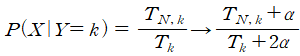  
가중치 alpha를 이용하여 스무딩의 정도를 정한다. 라플라스 스무딩을 이용하면 특정 특징 x에 대한 우도가 0이 될 일이 없어지게 된다. (alpha는 0.5또는 1을 주로 사용)

In [18]:
mod_laplace = MultinomialNB(alpha=0.5, class_prior=None, fit_prior = True)
mod_laplace.fit(tfidfv,newsdata.target)

MultinomialNB(alpha=0.5)

In [20]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
X_test_dtm = dtmvector.transform(newsdata_test.data)
tfidfv_test = tfidf_transformer.transform(X_test_dtm)

predicted = mod.predict(tfidfv_test)
print("accuracy : ", accuracy_score(newsdata_test.target, predicted))

accuracy :  0.7738980350504514


In [21]:
predicted_lp = mod_laplace.predict(tfidfv_test)
print("accuracy : ", accuracy_score(newsdata_test.target, predicted_lp))

accuracy :  0.7977960701009028
